In [12]:
import os
import operator
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import collections

from itertools import groupby
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [3]:
# base directory
BASE_DIR = '..'

# data directory
DATA_DIR = os.path.join(BASE_DIR, 'data')

# raw, interim & processed data directory
RAW_DIR = os.path.join(DATA_DIR, 'raw')
INTERIM_DIR = os.path.join(DATA_DIR, 'interim')
PROCESSED_DIR = os.path.join(DATA_DIR, 'processed')


# raw data
TRAIN = os.path.join(RAW_DIR, 'train')
TEST = os.path.join(RAW_DIR, 'test')
DF_TRAIN = os.path.join(TRAIN, 'train.csv')
SAMPLE_SUBMISSION = os.path.join(RAW_DIR, 'sample_submission.csv')

# interim data
TRAIN_BY_CLASS = os.path.join(INTERIM_DIR, 'train')
VALIDATION_BY_CLASS = os.path.join(INTERIM_DIR, 'validation')
TEST_BY_CLASS = os.path.join(INTERIM_DIR, 'test')

## Datagen

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_BY_CLASS,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

train_generator_ = test_datagen.flow_from_directory(
    TRAIN_BY_CLASS,
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    VALIDATION_BY_CLASS,
    target_size=(150, 150),
    batch_size=64,
    shuffle=False,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    TEST_BY_CLASS,
    target_size=(150, 150),
    batch_size=64,
    shuffle=False,
    class_mode='categorical')

Found 12578 images belonging to 7 classes.
Found 12578 images belonging to 7 classes.
Found 1475 images belonging to 7 classes.
Found 1475 images belonging to 7 classes.


## Models (Baseline)

In [11]:
# resnet50v2, data augmentation, 10 epochs, 2e-5 lr
model = load_model('models/201022/resnet50v2/1/model.10-0.19.h5')    

In [32]:
# resnet50v2, data augmentation, 30 epochs, 2e-5 lr
model = load_model('models/201022/resnet50v2/2/model.24-0.14.h5')

In [39]:
# resnet50v2, data augmentation, 10 epochs, 1e-3 lr
model = load_model('models/201022/resnet50v2/3/model.09-0.18.h5')

In [46]:
# resnet50v2, data augmentation, 30 epochs, 1e-3 lr
model = load_model('models/201022/resnet50v2/4/model.19-0.18.h5')

## Models (w/ & w/o Data Augmentation)

In [8]:
# resnet50v2, NO data augmentation, 30 epochs, 2e-5 lr
model = load_model('models/201110/resnet50v2/1/model.10-0.20.h5')

In [11]:
# xception, data augmentation, 30 epochs, 2e-5 lr
model = load_model('models/201110/xception/1/model.21-0.20.h5')

In [13]:
# xception, NO data augmentation, 30 epochs, 2e-5 lr
model = load_model('models/201110/xception/2/model.04-0.14.h5')

In [15]:
# vgg16, data augmentation, 30 epochs, 2e-5 lr
model = load_model('models/201110/vgg16/1/model.28-0.29.h5')

In [17]:
# vgg16, NO data augmentation, 30 epochs, 2e-5 lr
model = load_model('models/201110/vgg16/2/model.30-0.20.h5')

## Models (Data augmentation validation)
These models are to provide support that NO data augmentation does indeed decrease validation loss as shown above. (or I have made a mistake labelling the models and it should be the other way round)

In [7]:
# xception, data augmentation, 30 epochs, 2e-5 lr
model = load_model('models/201112/xception/3/model.25-0.19.h5')

In [8]:
# xception, NO data augmentation, 30 epochs, 2e-5 lr
model = load_model('models/201112/xception/4/model.04-0.15.h5')

## Models (Fine-Tuned, by unfreezing weights starting from last block of convolutional base)

In [21]:
# resnet50v2, data augmentation, 30 epochs, 2e-5 lr, fine-tuned
model = load_model('models/201112/resnet50v2/1/model.21-0.12.h5')

In [23]:
# resnet50v2, NO data augmentation, 30 epochs, 2e-5 lr, fine-tuned
model = load_model('models/201112/resnet50v2/2/model.04-0.22.h5')

In [25]:
# xception, data augmentation, 30 epochs, 2e-5 lr, fine-tuned
model = load_model('models/201112/xception/1/model.24-0.13.h5')

In [27]:
# xception, NO data augmentation, 30 epochs, 2e-5 lr, fine-tuned
model = load_model('models/201112/xception/2/model.02-0.17.h5')

In [10]:
# vgg16, data augmentation, 30 epochs, 2e-5 lr, fine-tuned
model = load_model('models/201111/vgg16/1/model.23-0.09.h5')

In [31]:
# vgg16, NO data augmentation, 30 epochs, 2e-5 lr, fine-tuned
model = load_model('models/201111/vgg16/2/model.02-0.16.h5')

## Prediction

              precision    recall  f1-score   support

      113209       0.96      0.96      0.96       200
      126637       0.92      0.98      0.95       218
      138982       0.98      1.00      0.99       220
      177870       0.96      0.84      0.90       200
      194914       0.97      0.97      0.97       200
       20409       0.99      0.98      0.98       218
       83144       0.93      0.96      0.95       219

    accuracy                           0.96      1475
   macro avg       0.96      0.96      0.96      1475
weighted avg       0.96      0.96      0.96      1475



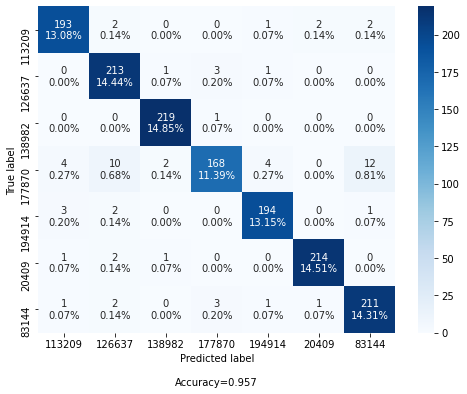

In [11]:
# All cells below combined
pred = model.predict_generator(test_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames = test_generator.filenames
filenames = [i.split('\\')[0] for i in filenames]
c_matrix = confusion_matrix(filenames, predictions)
c_report = classification_report(filenames, predictions)
categories = list(labels.values())

print(c_report)
make_confusion_matrix(
    c_matrix, 
    figsize=(8,6), 
    cbar=True,
    categories=categories
)


In [47]:
pred = model.predict_generator(test_generator)

In [48]:
predicted_class_indices=np.argmax(pred,axis=1)

In [49]:
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [50]:
filenames = test_generator.filenames
filenames = [i.split('\\')[0] for i in filenames]

In [51]:
c_report = classification_report(filenames, predictions)
c_matrix = confusion_matrix(filenames, predictions)

In [52]:
print(c_report)
print(c_matrix)

              precision    recall  f1-score   support

      113209       0.97      0.94      0.95       200
      126637       0.85      0.96      0.90       218
      138982       0.97      1.00      0.98       220
      177870       0.93      0.76      0.83       200
      194914       0.96      0.94      0.95       200
       20409       0.95      0.98      0.96       218
       83144       0.92      0.95      0.94       219

    accuracy                           0.93      1475
   macro avg       0.94      0.93      0.93      1475
weighted avg       0.94      0.93      0.93      1475

[[187   3   1   0   1   4   4]
 [  1 209   0   4   2   1   1]
 [  0   0 219   0   1   0   0]
 [  3  22   3 151   3   5  13]
 [  0   8   2   1 189   0   0]
 [  0   2   1   1   0 214   0]
 [  1   2   0   5   0   2 209]]


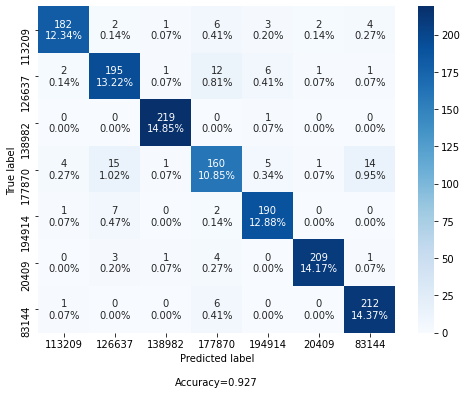

In [18]:
categories = list(labels.values())
make_confusion_matrix(
    c_matrix, 
    figsize=(8,6), 
    cbar=True,
    categories=categories
)

In [6]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [7]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def plot_confusion_matrix(cm, labels, title, cmap=plt.cm.Blues):
    #cmap=cmap=plt.cm.binary
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #cax = ax.matshow(cm)
    #fig.colorbar(cax)

    #c = ax.pcolor(cm, cmap=cmap)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    #show_values_conf_matr(c)
    ax.set_xticklabels([""] + list(labels), rotation=90)
    ax.set_yticklabels([""] + list(labels))
    plt.tight_layout()
    plt.xlabel('Predicted class')
    plt.ylabel('True class')
    plt.title(title)
    ax.tick_params(axis='both', which='both', length=0)

    width, height = cm.shape

    colour_threshold = np.amax(cm) / 2

    for x in range(width):
        for y in range(height):
            if cm[x][y] > 0:
                if cm[x][y] > colour_threshold:
                    color = 'white'
                else:
                    color = 'black'

                ax.text(y,
                        x,
                        str(cm[x][y]),
                        verticalalignment='center',
                        horizontalalignment='center',
                        color=color,
                        fontsize=15)

                       #bbox=dict(facecolor='white', edgecolor='white', boxstyle='circle'),
                       #color='black',
                       #fontsize=15)


def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: http://stackoverflow.com/a/25074150/395857
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.get_axes()
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=20, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - http://stackoverflow.com/a/16124677/395857
    - http://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Remove last blank column
    plt.xlim((0, AUC.shape[1]))

    # Turn off all the ticks
    ax = plt.gca()
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()

    # resize
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))


def plot_classification_report(classification_report, title, cmap=plt.cm.Blues):
    '''
    Plot scikit-learn classification report.
    Extension based on http://stackoverflow.com/a/31689645/395857
    '''
    lines = classification_report.split('\\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        #print(v)
        plotMat.append(v)

    #print('plotMat: {0}'.format(plotMat))
    #print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 15
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat),
            title + ' classification report',
            xlabel,
            ylabel,
            xticklabels,
            yticklabels,
            figure_width,
            figure_height,
            correct_orientation,
            cmap=cmap)


def plot_probs(model, X_train, X_test, y_train, y_test, title, classes):
    colours = ['r', 'g', 'b', 'y', 'm']

    def get_coords(y_p, y_t):
        coords_with_colour = []

        for y_pred, y_true in zip(y_p, y_t):

            max_idx = np.argmax(y_pred)
            coord_x = np.max(y_pred)

            if max_idx == y_true:
                coord_y = 1
            else:
                coord_y = 0

            coords_with_colour.append((coord_x, coord_y, colours[y_true], y_true))

        return coords_with_colour


    f, axarr = plt.subplots(len(np.unique(y_train)), 2, sharex=True, sharey=True)
    for k, g in groupby(get_coords(model.predict_proba(X_train), y_train), key=operator.itemgetter(3)):
        for c in g:
            axarr[k - 1, 0].plot(c[0], c[1], 'o', markerfacecolor='white', markeredgecolor='black')
            axarr[k - 1, 0].set_ylim([-1, 2])
            axarr[k - 1, 0].set_xlim([-0.1, 1.1])
            axarr[k - 1, 0].set_yticks([0, 1])
            #axarr[k - 1, 0].set_ylabel(le.classes_[k], rotation=0, size='large')

    for k, g in groupby(get_coords(model.predict_proba(X_test), y_test), key=operator.itemgetter(3)):
        #axarr[k - 1, 1].set_label_position('right')
        f.text(0.95, 0.18 + k * 0.16, classes[k], weight='normal') #, ha='left', va='center')

        for c in g:
            axarr[k - 1, 1].plot(c[0], c[1], 'o', markerfacecolor='white', markeredgecolor='black')
            axarr[k - 1, 1].set_ylim([-1, 2])
            axarr[k - 1, 1].set_xlim([-0.1, 1.1])

    f.text(0.5, 0.04, 'probability', ha='center', va='center')
    f.text(0.06, 0.5, 'correct (1.0), not correct (0.0)', ha='center', va='center', rotation='vertical')

    plot_title = title + ' confidence'

    f.suptitle(plot_title, horizontalalignment='center', y=1, fontsize=14)

    axarr[0][0].set_title('training')
    axarr[0][1].set_title('testing')

    f.set_size_inches(*cm2inch(30), *cm2inch(15))